In [ ]:
# Code :  François Roberge 
# (/home/roberge/Scripts/Montreal_inondation/MTL_FLOOD_4ans_v2/Domaines/Plot_domain/Domaines_Alejandro/plot_HRDPS_OnlyEast_2domains_cordexm_FR.py)

In [1]:
#
# Before opening Python execute:
#module load python3/miniconda3
#module load development/python3-rpn
#module load python3/outils-divers
#source activate base_plus


# Importation of modules and library
import numpy as np                         # Good module for matrix and matrix operation
import matplotlib.pyplot as plt            # Module to produce figure
import matplotlib.colors as colors
import os                                  # Used to convert png to other format
import rpnpy.librmn.all as rmn             # Module to read RPN files
from rotated_lat_lon import RotatedLatLon  # Module to project field on native grid (created by Sasha Huziy)

import cartopy.crs as ccrs                 # Import cartopy ccrs
import cartopy.feature as cfeature         # Import cartopy common features
import shapely.geometry as sgeom
from matplotlib.lines import Line2D

import netCDF4

{}
263.0 47.5 353.0 0.0
{}
260.0 53.0 275.0 50.0


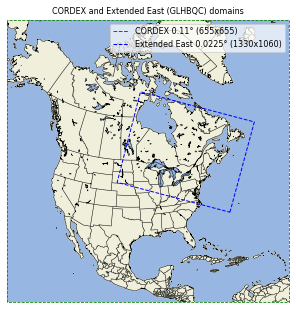

In [2]:
######################### THIS FILE IS ONLY USED TO GET GEM MODEL GRID DESCRIPTION (ROTATION MATRIX)
fichier_rpn_CORDEX='/pampa/roberge/Geophys/Geophys_NAM-11_CCI-LC_675x675/var_MG_free_grid.rpn'
varname_rpn_CORDEX='MG'

# Read one record
# ---------------
fid = rmn.fstopenall(fichier_rpn_CORDEX,rmn.FST_RO)   # Open the file
rec = rmn.fstlir(fid,nomvar=varname_rpn_CORDEX)        # Read the full record of variable 'varname'
field = rec['d']                            # Assign 'field' to the data of 'varname'

# Read 2-D latitudes & longitudes - if needed
mygrid = rmn.readGrid(fid,rec)              # Get the grid information for the (LAM) Grid -- Reads the tictac's
latlondict = rmn.gdll(mygrid)               # Create 2-D lat and lon fields from the grid information
lat_CORDEX = latlondict['lat']                     # Assign 'lat' to 2-D latitude field
lon_CORDEX = latlondict['lon']                     # Assign 'lon' to 2-D longitude field

# Get grid rotation for projection of 2-D field for mapping - if needed
tics = rmn.fstlir(fid,nomvar='^^', ip1=rec['ig1'],ip2=rec['ig2'],ip3=rec['ig3']) # Read corresponding tictac's

# Close RPN input file
rmn.fstcloseall(fid)                        # Close the RPN file

# 2-D Mapping - if needed
# -----------------------
# Get positions of rotated equator from IG1-4 of the tictac's
(Grd_xlat1,Grd_xlon1,Grd_xlat2,Grd_xlon2) = rmn.cigaxg('E', tics['ig1'],tics['ig2'],tics['ig3'],tics['ig4'])

# Use Sasha's RotatedLatLon to get the rotation matrix
rll = RotatedLatLon( lon1=Grd_xlon1, lat1=Grd_xlat1, lon2=Grd_xlon2, lat2=Grd_xlat2) # the params come from gemclim_settings.nml
# Use Sasha's get_cartopy_projection_obj to get the cartopy object for the projection and domain defined by the coordinates
m_CORDEX = rll.get_cartopy_projection_obj()

xll_CORDEX, yll_CORDEX = m_CORDEX.transform_point(lon_CORDEX[0, 0],lat_CORDEX[0, 0],ccrs.PlateCarree())
xur_CORDEX, yur_CORDEX = m_CORDEX.transform_point(lon_CORDEX[-1, -1],lat_CORDEX[-1, -1], ccrs.PlateCarree())

#########################

######################### THIS FILE IS ONLY USED TO GET GEM MODEL GRID DESCRIPTION (ROTATION MATRIX)
fichier_rpn_EAST = '/pampa/roberge/Geophys/Geophys_GLHBQC_1350x1080_50pts_vers_est_CCI-LC/var_MG_free_grid.rpn'
varname_rpn_EAST = 'MG'    # Name of variable to read

# Read one record
# ---------------
fid = rmn.fstopenall(fichier_rpn_EAST,rmn.FST_RO)   # Open the file
rec = rmn.fstlir(fid,nomvar=varname_rpn_EAST)        # Read the full record of variable 'varname'
field = rec['d']                            # Assign 'field' to the data of 'varname'

# Read 2-D latitudes & longitudes - if needed
mygrid = rmn.readGrid(fid,rec)              # Get the grid information for the (LAM) Grid -- Reads the tictac's
latlondict = rmn.gdll(mygrid)               # Create 2-D lat and lon fields from the grid information
lat_EAST = latlondict['lat']                     # Assign 'lat' to 2-D latitude field
lon_EAST = latlondict['lon']                     # Assign 'lon' to 2-D longitude field

# Get grid rotation for projection of 2-D field for mapping - if needed
tics = rmn.fstlir(fid,nomvar='^^', ip1=rec['ig1'],ip2=rec['ig2'],ip3=rec['ig3']) # Read corresponding tictac's

# Close RPN input file
rmn.fstcloseall(fid)                        # Close the RPN file

# 2-D Mapping - if needed
# -----------------------
# Get positions of rotated equator from IG1-4 of the tictac's
(Grd_xlat1,Grd_xlon1,Grd_xlat2,Grd_xlon2) = rmn.cigaxg('E', tics['ig1'],tics['ig2'],tics['ig3'],tics['ig4'])

# Use Sasha's RotatedLatLon to get the rotation matrix
rll = RotatedLatLon( lon1=Grd_xlon1, lat1=Grd_xlat1, lon2=Grd_xlon2, lat2=Grd_xlat2) # the params come from gemclim_settings.nml
# Use Sasha's get_cartopy_projection_obj to get the cartopy object for the projection and domain defined by the coordinates
m_EAST = rll.get_cartopy_projection_obj()

xll_EAST, yll_EAST = m_EAST.transform_point(lon_EAST[0, 0],lat_EAST[0, 0],ccrs.PlateCarree())
xur_EAST, yur_EAST = m_EAST.transform_point(lon_EAST[-1, -1],lat_EAST[-1, -1], ccrs.PlateCarree())
#########################

# Output image information
title = "CORDEX and Extended East (GLHBQC) domains"
image_output_file = "/pampa/cloutier/fig/domaine_CORDEXm_ExtE_domains_vfinal_FR.png"
image_output_dpi = 150
# ================================================

# Figure settings - if needed
# ---------------------------
figsize = (5, 4.4)      # Figure size
fig = plt.figure(figsize=figsize)

# Set projection defined by the cartopy object
ax = plt.axes(projection=m_CORDEX)

# Plotting - if needed
# --------------------

# Set geographic features
ax.add_feature(cfeature.OCEAN.with_scale('50m'))      # couche ocean
ax.add_feature(cfeature.LAND.with_scale('50m'))       # couche land
ax.add_feature(cfeature.LAKES.with_scale('50m'),edgecolor='black',linewidth=0.5)      # couche lac
ax.add_feature(cfeature.BORDERS.with_scale('50m'),linewidth=0.5)    # couche frontieres
coast = cfeature.NaturalEarthFeature(category='physical', scale='50m', facecolor='none', name='coastline',linewidth=0.5) # ajout de la couche cotière
ax.add_feature(coast, edgecolor='black')

states_provinces = cfeature.NaturalEarthFeature(category='cultural',name='admin_1_states_provinces_lines',scale='10m',facecolor='none') # Couche provinces
ax.add_feature(states_provinces, edgecolor='black',linewidth=0.5)

ax.set_extent([xll_CORDEX, xur_CORDEX, yll_CORDEX, yur_CORDEX], crs=m_CORDEX)
ax.spines['geo'].set_edgecolor('green')
ax.spines['geo'].set_linestyle('--')
#ax.spines['geo'].set_label('0.135°')

box_EAST = sgeom.box(minx=xll_EAST,maxx=xur_EAST,miny=yll_EAST,maxy=yur_EAST)

ax.add_geometries([box_EAST], m_EAST, facecolor='none', edgecolor='blue',linestyle='--')

colors = ['green', 'blue']
lines = [Line2D([0], [0], color=c, linewidth=1, linestyle='--') for c in colors]
labels = ['CORDEX 0.11° (655x655)', 'Extended East 0.0225° (1330x1060)']

plt.legend(lines, labels,framealpha=0.7,fontsize=8)

# Plot title
plt.title(title, fontsize=8)

# To help the layout of the figure after saving
fig.canvas.draw()
plt.tight_layout()  # To help with the layout of the figure after saving

# Save figure
#fig.savefig('python.png', dpi=image_output_dpi, format='png') # Most backends support png, pdf, ps, eps and svg
#os.system ('convert python.png ' + image_output_file)         # Convert python.png to 'image_output_file', i.e. .gif
